In [1]:
# We shall use OpenCV for k-means clustering

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os 

%matplotlib inline

In [2]:
colors = [np.array([255, 98, 6]), np.array([255, 255, 0]), np.array([4, 217, 255]), 
          np.array([102, 255, 0]), np.array([0, 27, 148]), np.array([128, 0, 0]),
         np.array([1, 50, 32])]

In [3]:
cluster_folder = r'C:/Users/vidit/Documents/UW_Research_Mittal_Lab/Clustering/Models//'
extraction_folder = r'C:/Users/vidit/Documents/UW_Research_Mittal_Lab/Clustering/'

In [4]:
img = cv2.imread('Extracted.tif')

In [5]:
def model(cluster_num):
    img2 = img.reshape((-1, 3))
    img2 = np.float32(img2)

    # We define criteria based on epsilon and number of iterations i.e. whichever is achieved first
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 0.1)

    # Number of clusters
    k = cluster_num

    # Number of attempts (no. of times algo is executed using different labellings)
    attempts = 10

    # Three outputs
    #compact = compactness (sum of squared of distances)
    #labels = required labels
    #center = center of each cluster

    compact, label, center = cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    # Converting centers to integers so they can be plotted
    center = np.uint8(center)

    # Flatteing the label for pixel and then getting the resultant array
    res = center[label.flatten()]

    # Converting the flat array to original image shape
    res = res.reshape((img.shape))

    plt.imsave(cluster_folder + str(k) + "_clusters.jpg", res)
    
    return compact

In [7]:
compactness = []

for i in tqdm(range(2, 20)):
    c = model(i)
    compactness.append(c)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [29:14<00:00, 97.48s/it]


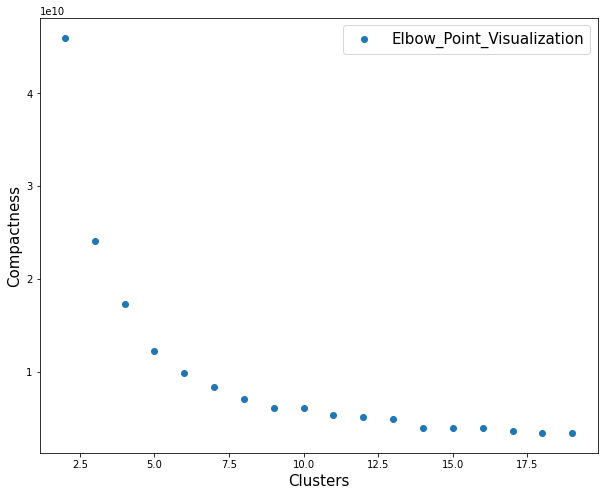

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(np.linspace(2, 19, 18), compactness, label="Elbow_Point_Visualization")
plt.xlabel("Clusters", fontsize=15)
plt.ylabel("Compactness", fontsize=15)
plt.legend(fontsize=15)

In [6]:
# 10 looks like a good enough elbow point

def final_model(cluster_num):
    img2 = img.reshape((-1, 3))
    img2 = np.float32(img2)

    # We define criteria based on epsilon and number of iterations i.e. whichever is achieved first
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 0.1)

    # Number of clusters
    k = cluster_num

    # Number of attempts (no. of times algo is executed using different labellings)
    attempts = 10

    # Three outputs
    #compact = compactness (sum of squared of distances)
    #labels = required labels
    #center = center of each cluster

    compact, label, center = cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    return label, center

In [7]:
def cluster_extraction(cluster_num, tot_clust):
    new_center = np.zeros(center.shape)

    for i in range(len(center)):
        if i == cluster_num:
            col = np.random.randint(0, 6)
            new_center[i] = colors[col]
        else:
            new_center[i] = np.array([255, 255, 255])

    new_center = np.uint8(new_center)
    df = pd.DataFrame(label)
    df[0] = df[0].apply(lambda x: cluster_num if x==cluster_num else np.random.randint(0, tot_clust))
    lab_new = np.array(df)
    new_res = new_center[lab_new.flatten()]
    new_res = new_res.reshape((img.shape))
    par_dir = r'C:/Users/vidit/Documents/UW_Research_Mittal_Lab/Clustering/'
    direc = "Extractions_" + str(tot_clust)
    path = os.path.join(par_dir, direc)  
    plt.imsave(path + "/Cluster" + str(cluster_num) + ".jpg", new_res)

In [8]:
for i in tqdm(range(10, 20)):
    total = i
    label, center = final_model(total)
    par_dir = r'C:/Users/vidit/Documents/UW_Research_Mittal_Lab/Clustering/'
    direc = "Extractions_" + str(total)
    path = os.path.join(par_dir, direc)  
    os.mkdir(path)
    for i in range(total):
        cluster_extraction(i, total)

100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [2:51:33<00:00, 1029.38s/it]
